<a href="https://colab.research.google.com/github/Sanim27/GAN/blob/main/Simple_GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn
from tqdm.auto import tqdm
from torchvision import transforms
from torchvision.datasets import MNIST
from torchvision.utils import make_grid
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
torch.manual_seed(0)
def show_tensor_images(image_tensor, num_images=25, size=(1, 28, 28)):
    '''
    Function for visualizing images: Given a tensor of images, number of images, and
    size per image, plots and prints the images in a uniform grid.
    '''
    image_unflat = image_tensor.detach().cpu().view(-1, *size)
    image_grid = make_grid(image_unflat[:num_images], nrow=5)
    plt.imshow(image_grid.permute(1, 2, 0).squeeze())
    plt.show()

In [ ]:
def get_generator_block(input_dim,output_dim):
  return nn.Sequential(
      nn.Linear(input_dim,output_dim),
      nn.BatchNorm1d(output_dim),
      nn.ReLU(inplace=True)
  )

In [ ]:
class Generator(nn.Module):
  def __init__(self,z_dim=10,im_dim=784,hidden_dim=128):
    super(Generator,self).__init__()
    self.gen=nn.Sequential(
        get_generator_block(z_dim,hidden_dim),
        get_generator_block(hidden_dim,hidden_dim*2),
        get_generator_block(hidden_dim*2,hidden_dim*4),
        get_generator_block(hidden_dim*4,hidden_dim*8),
        nn.Linear(hidden_dim*8,im_dim),
        nn.Sigmoid()
      )

  def forward(self,noise):
    return self.gen(noise)

  def get_gen(self):
    return self.gen

In [ ]:
def get_noise(n_samples,z_dim,device='cpu'):
  return torch.randn(n_samples,z_dim,device=device)

In [ ]:
def get_discriminator_block(input_dim,output_dim):
  return nn.Sequential(
      nn.Linear(input_dim,output_dim),
      nn.LeakyReLU(0.2,inplace=True)
  )

In [ ]:
class Discriminator(nn.Module):
  def __init__(self,im_dim=784,hidden_dim=128):
    super(Discriminator,self).__init__()
    self.disc=nn.Sequential(
        get_discriminator_block(im_dim,hidden_dim*4),
        get_discriminator_block(hidden_dim*4,hidden_dim*2),
        get_discriminator_block(hidden_dim*2,hidden_dim),
        nn.Linear(hidden_dim,1)
    )
  def forward(self,image):
    return self.disc(image)
  def get_disc(self):
    return self.disc

In [ ]:
criterion = nn.BCEWithLogitsLoss()
n_epochs = 200
z_dim = 64
display_step = 500
batch_size = 128
lr = 0.00001
device = 'cuda'
# Load MNIST dataset as tensors
dataloader = DataLoader(
    MNIST('.', download=True, transform=transforms.ToTensor()),
    batch_size=batch_size,
    shuffle=True)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 15466130.31it/s]


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 491721.92it/s]


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 4319570.41it/s]


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 5502752.39it/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



In [ ]:
gen=Generator(z_dim).to(device)
gen_opt=torch.optim.Adam(gen.parameters(),lr=lr)
disc=Discriminator().to(device)
disc_opt=torch.optim.Adam(disc.parameters(),lr=lr)

In [ ]:
def get_disc_loss(gen, disc, criterion, real, num_images, z_dim, device):
  noise=get_noise(num_images,z_dim,device=device)
  fake=gen(noise).detach()
  disc_fake = disc(fake)
  disc_fake_loss = criterion(disc_fake, torch.zeros_like(disc_fake))
  disc_real = disc(real)
  disc_real_loss = criterion(disc_real, torch.ones_like(disc_real))
  disc_loss = (disc_fake_loss + disc_real_loss) / 2
  return disc_loss

In [ ]:
def get_gen_loss(gen, disc, criterion, num_images, z_dim, device):
  noise=get_noise(num_images,z_dim,device=device)
  fake=gen(noise)
  disc_fake = disc(fake)
  gen_loss = criterion(disc_fake, torch.ones_like(disc_fake))
  return gen_loss

  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/469 [00:00<?, ?it/s]

Step 500: Generator loss: 1.463820165991783, discriminator loss: 0.4261821652054787


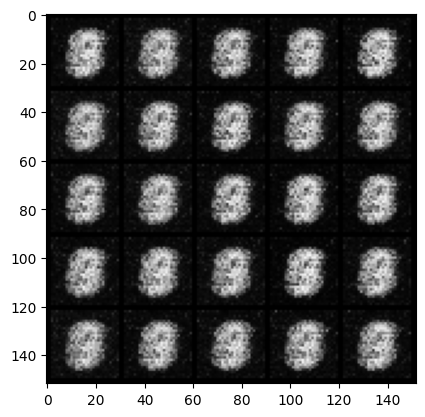

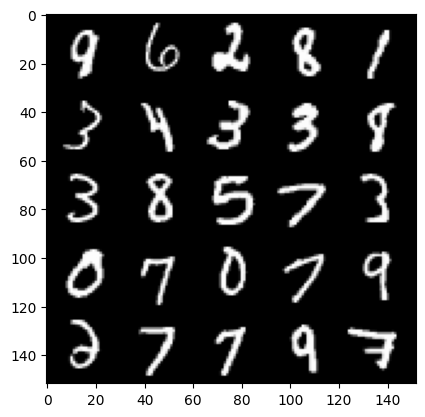

  0%|          | 0/469 [00:00<?, ?it/s]

Step 1000: Generator loss: 1.7545187456607811, discriminator loss: 0.29202247598767267


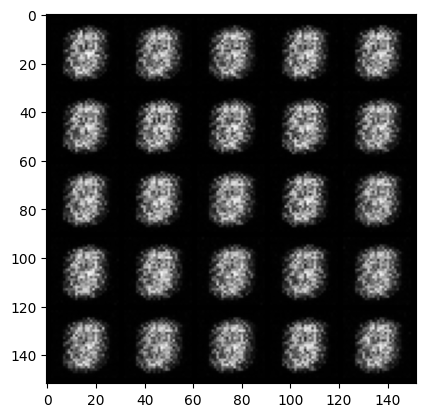

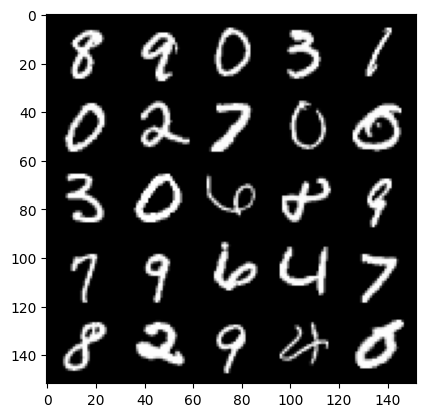

  0%|          | 0/469 [00:00<?, ?it/s]

Step 1500: Generator loss: 2.0624377758502948, discriminator loss: 0.168882222622633


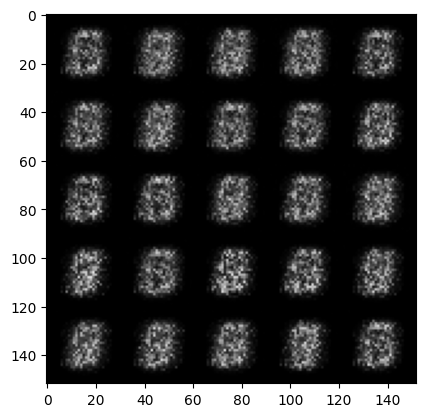

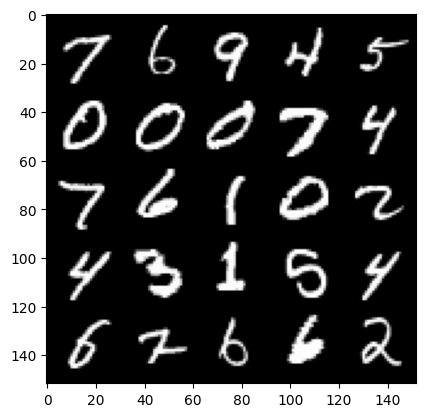

  0%|          | 0/469 [00:00<?, ?it/s]

Step 2000: Generator loss: 1.6976123182773595, discriminator loss: 0.23019514772295951


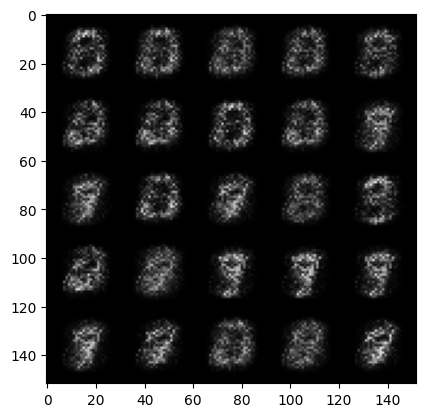

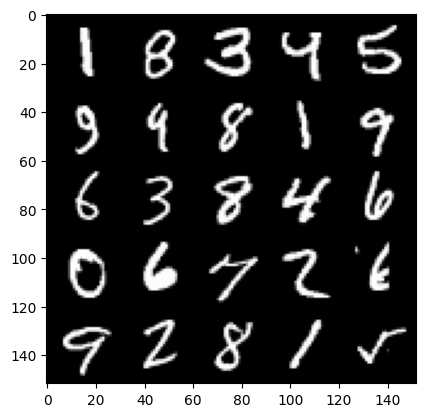

  0%|          | 0/469 [00:00<?, ?it/s]

Step 2500: Generator loss: 1.5789564061164836, discriminator loss: 0.22744349676370618


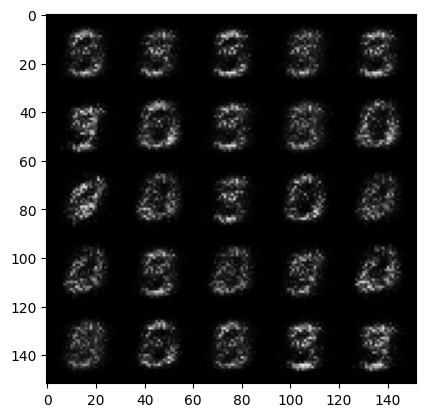

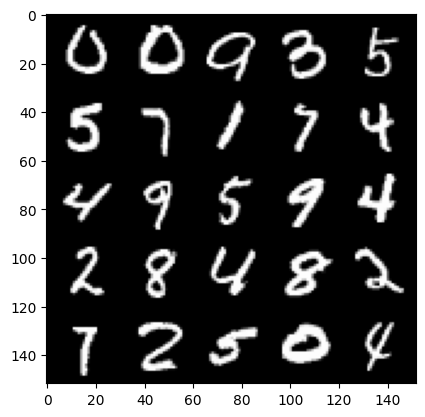

  0%|          | 0/469 [00:00<?, ?it/s]

Step 3000: Generator loss: 1.8079333298206324, discriminator loss: 0.17922055965662012


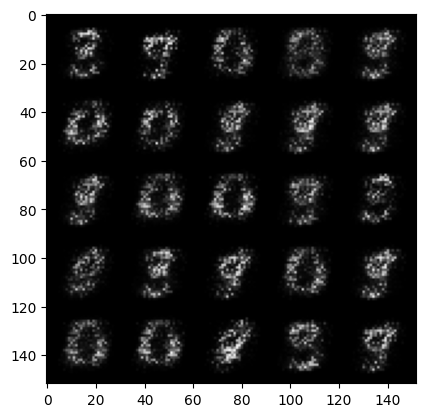

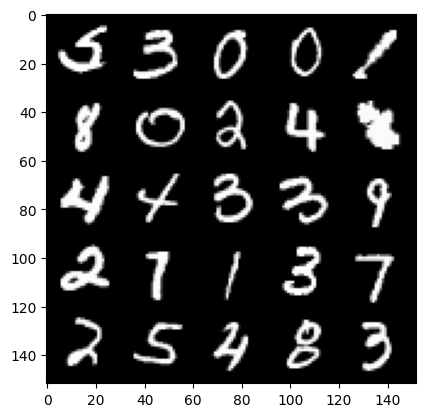

  0%|          | 0/469 [00:00<?, ?it/s]

Step 3500: Generator loss: 2.081425193548203, discriminator loss: 0.17077815864980223


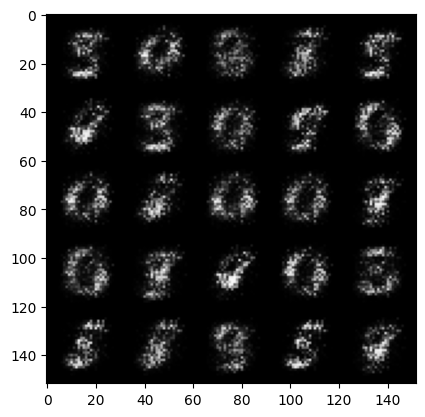

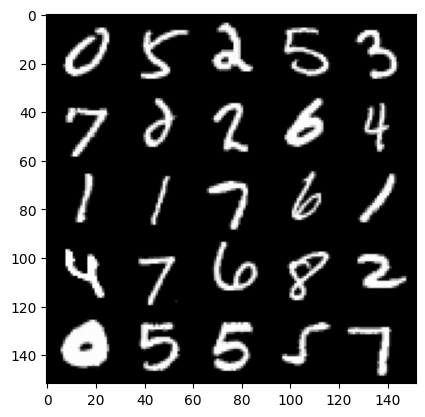

  0%|          | 0/469 [00:00<?, ?it/s]

Step 4000: Generator loss: 2.3816751933097846, discriminator loss: 0.1564607520699501


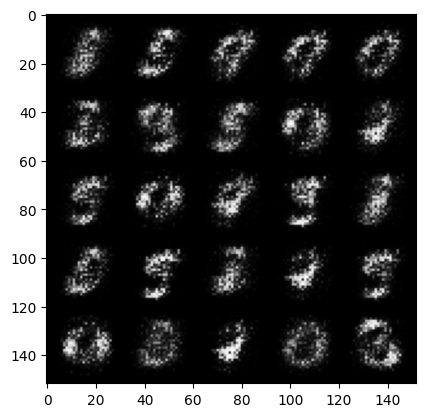

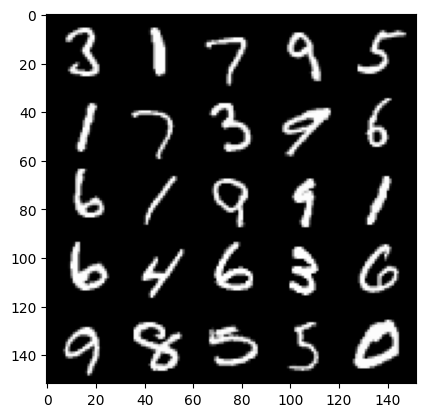

  0%|          | 0/469 [00:00<?, ?it/s]

Step 4500: Generator loss: 2.7269324512481687, discriminator loss: 0.13079502069950105


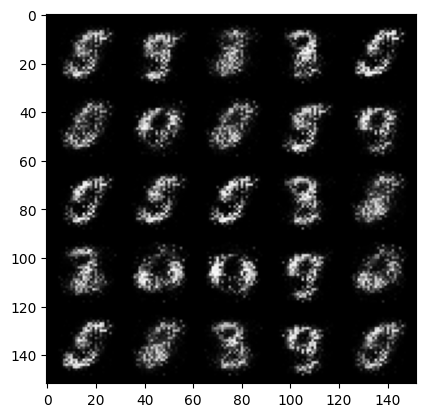

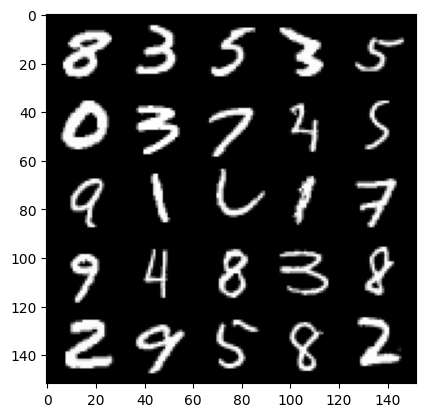

  0%|          | 0/469 [00:00<?, ?it/s]

Step 5000: Generator loss: 3.078652776241303, discriminator loss: 0.1039131036847829


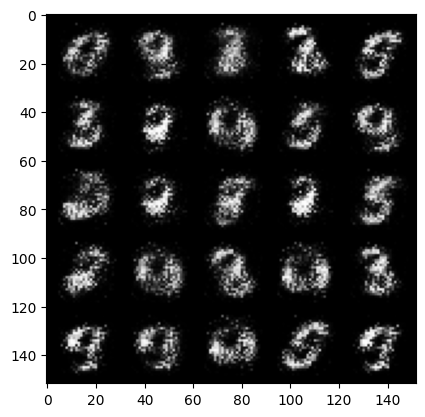

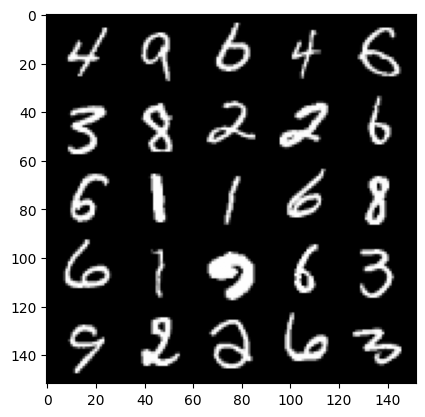

  0%|          | 0/469 [00:00<?, ?it/s]

Step 5500: Generator loss: 3.3280049057006855, discriminator loss: 0.10170875702798354


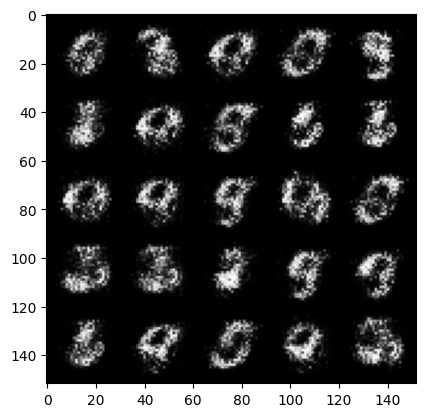

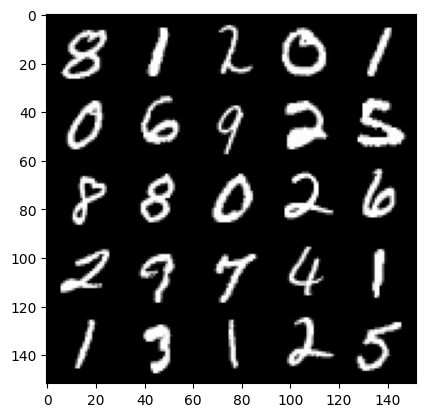

  0%|          | 0/469 [00:00<?, ?it/s]

Step 6000: Generator loss: 3.426584731101986, discriminator loss: 0.08093102877587074


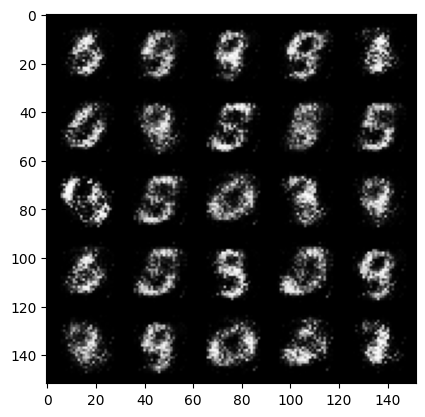

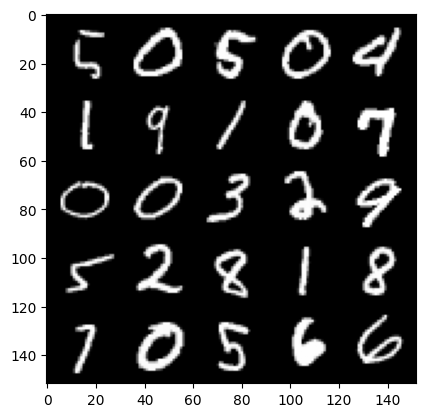

  0%|          | 0/469 [00:00<?, ?it/s]

Step 6500: Generator loss: 3.6459100098609913, discriminator loss: 0.07442704372853039


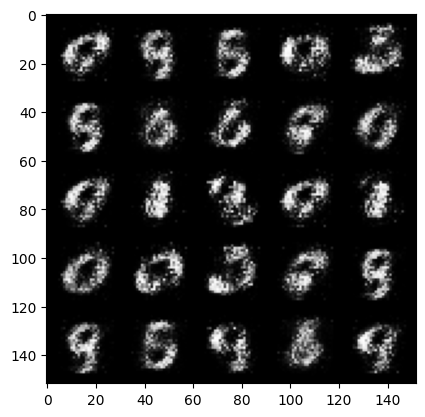

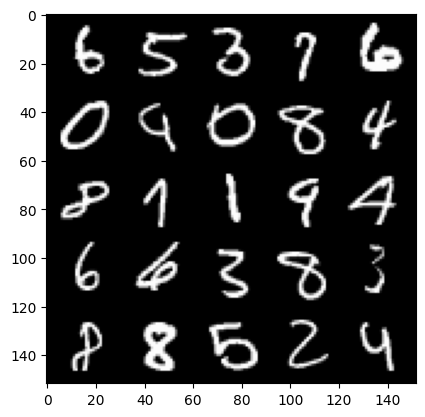

  0%|          | 0/469 [00:00<?, ?it/s]

Step 7000: Generator loss: 3.620047211647035, discriminator loss: 0.08045683364570144


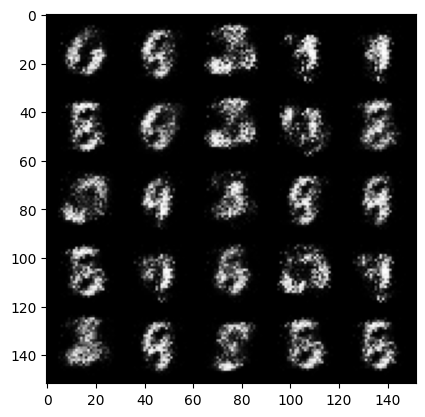

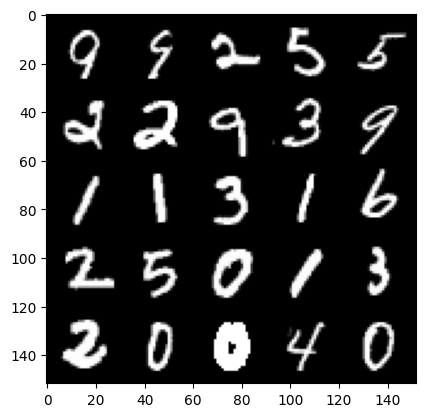

  0%|          | 0/469 [00:00<?, ?it/s]

Step 7500: Generator loss: 3.640501240730288, discriminator loss: 0.07458423154801137


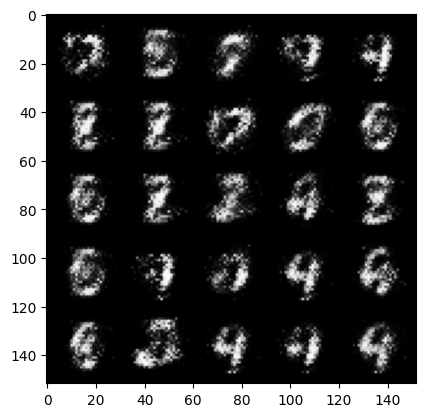

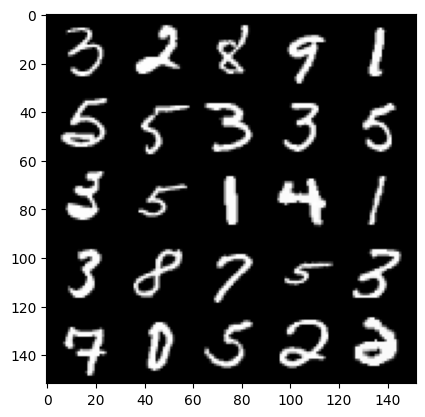

  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/469 [00:00<?, ?it/s]

Step 8000: Generator loss: 3.868989965915684, discriminator loss: 0.05856519524753097


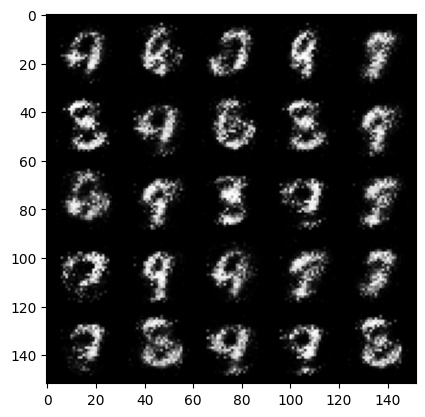

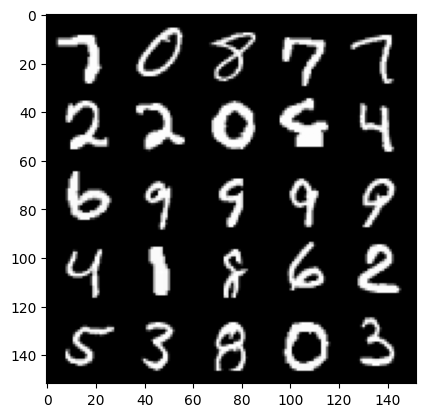

  0%|          | 0/469 [00:00<?, ?it/s]

Step 8500: Generator loss: 4.00574929523468, discriminator loss: 0.06122661389783029


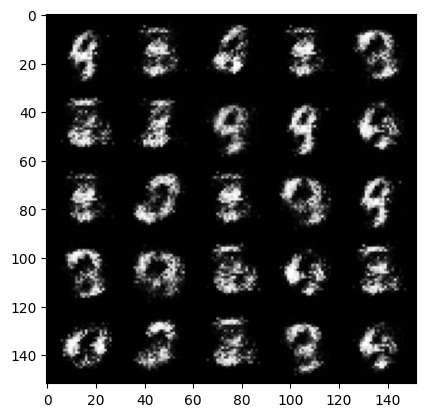

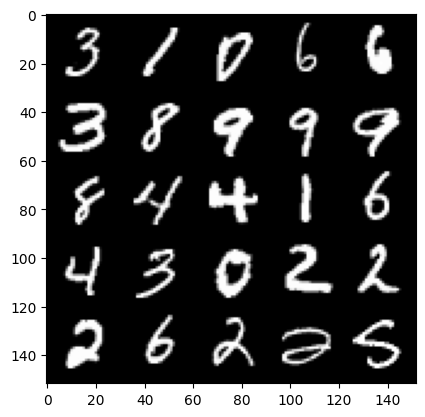

  0%|          | 0/469 [00:00<?, ?it/s]

Step 9000: Generator loss: 3.9247337412834136, discriminator loss: 0.06796590156853193


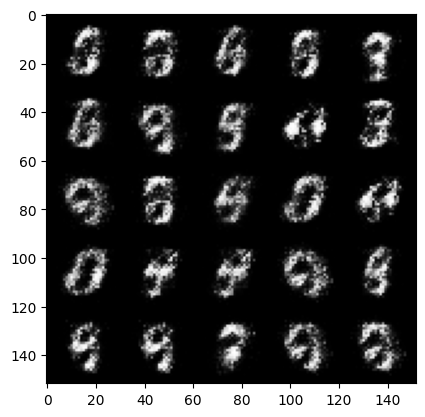

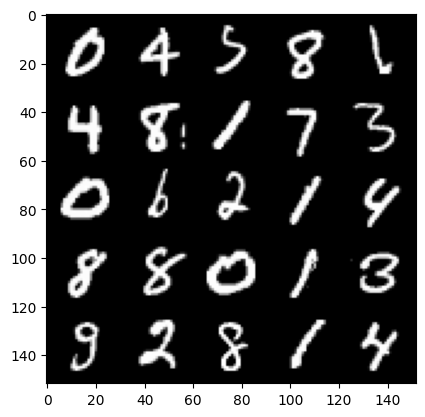

  0%|          | 0/469 [00:00<?, ?it/s]

Step 9500: Generator loss: 3.973808920860293, discriminator loss: 0.07349878734350206


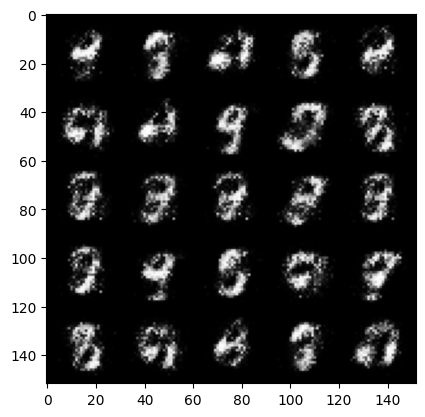

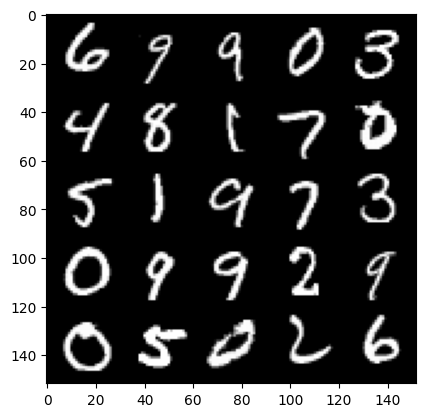

  0%|          | 0/469 [00:00<?, ?it/s]

Step 10000: Generator loss: 4.088358497142793, discriminator loss: 0.07691220736503594


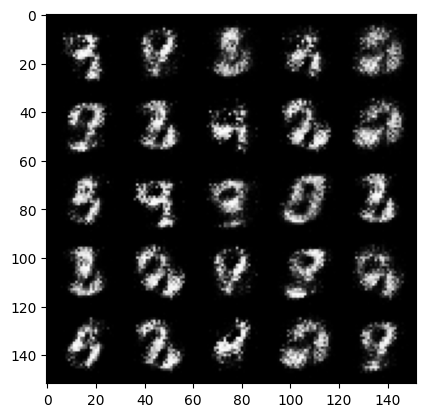

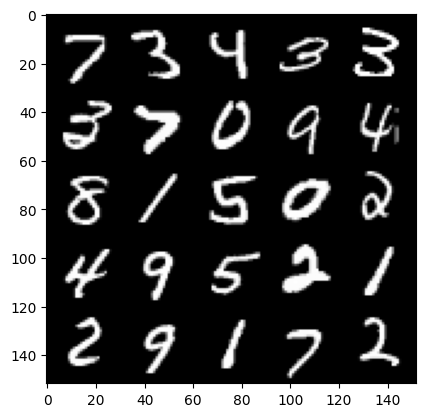

  0%|          | 0/469 [00:00<?, ?it/s]

Step 10500: Generator loss: 3.8066287245750408, discriminator loss: 0.0879428836628794


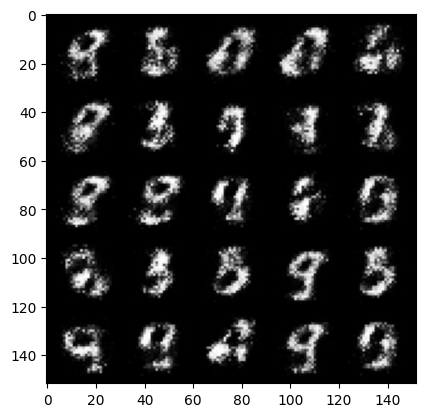

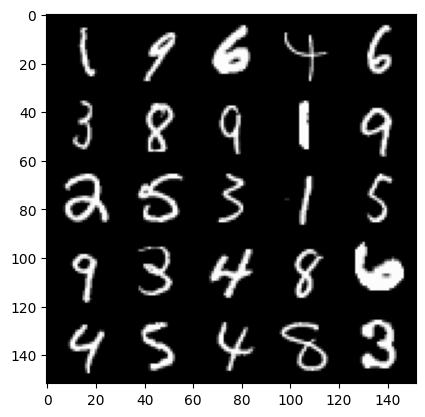

  0%|          | 0/469 [00:00<?, ?it/s]

Step 11000: Generator loss: 3.887649023056029, discriminator loss: 0.09397777973860504


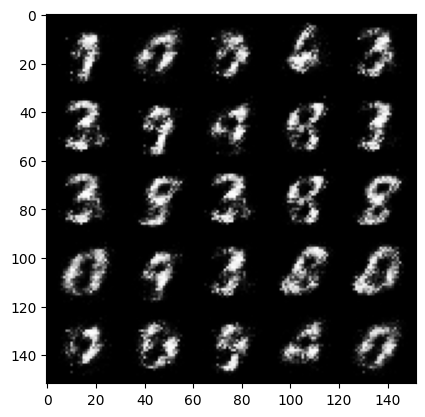

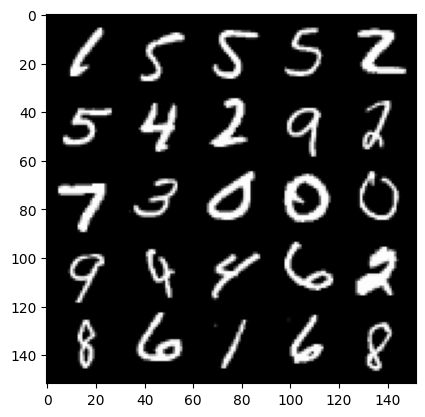

  0%|          | 0/469 [00:00<?, ?it/s]

Step 11500: Generator loss: 3.753670968532563, discriminator loss: 0.09956348054856058


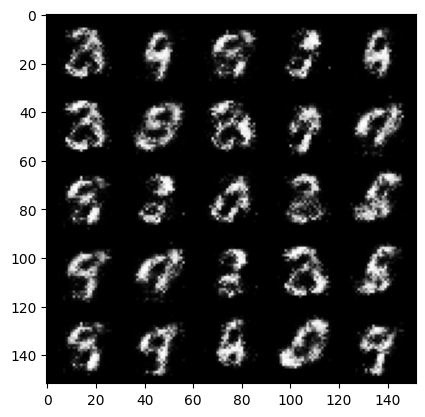

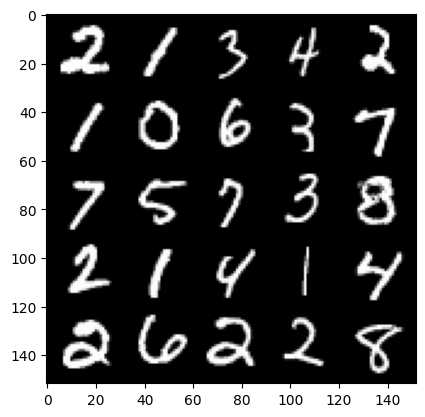

  0%|          | 0/469 [00:00<?, ?it/s]

Step 12000: Generator loss: 3.7012439298629762, discriminator loss: 0.10138269101083283


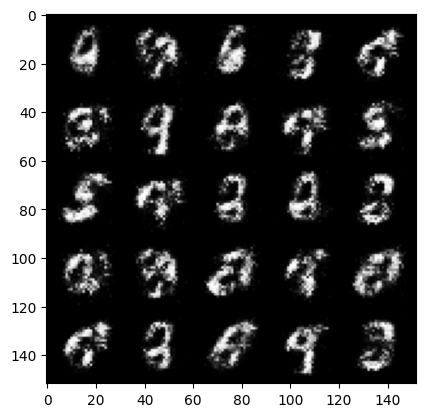

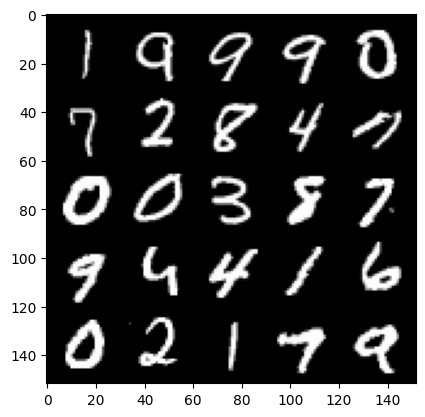

  0%|          | 0/469 [00:00<?, ?it/s]

Step 12500: Generator loss: 3.799153368949891, discriminator loss: 0.10900821122527111


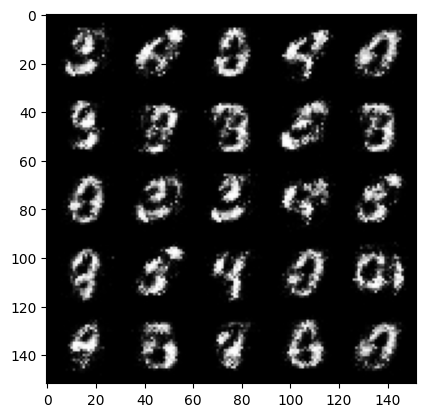

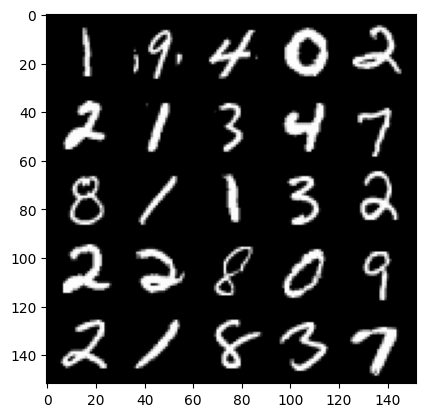

  0%|          | 0/469 [00:00<?, ?it/s]

Step 13000: Generator loss: 3.763943066596984, discriminator loss: 0.11199155735969535


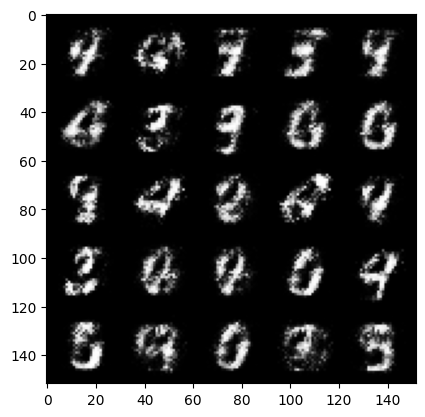

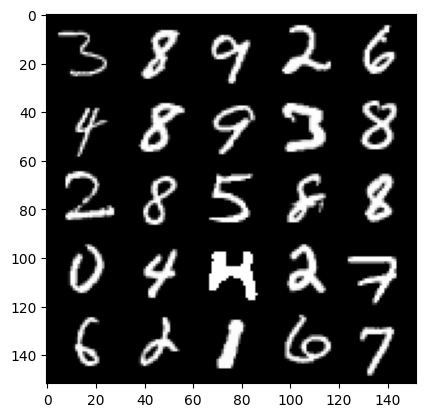

  0%|          | 0/469 [00:00<?, ?it/s]

Step 13500: Generator loss: 3.5820334568023693, discriminator loss: 0.11295150282979015


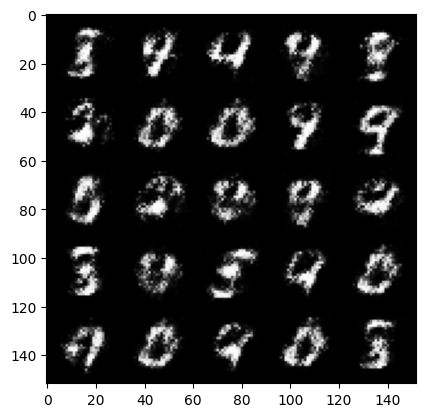

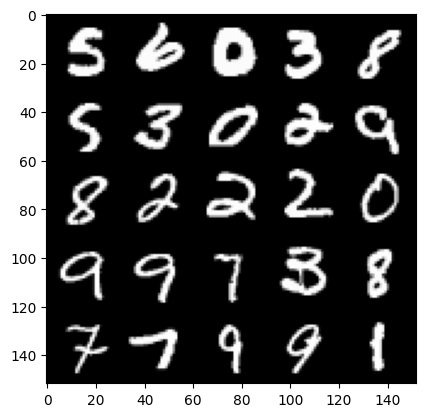

  0%|          | 0/469 [00:00<?, ?it/s]

Step 14000: Generator loss: 3.6219037384986836, discriminator loss: 0.11910727660357953


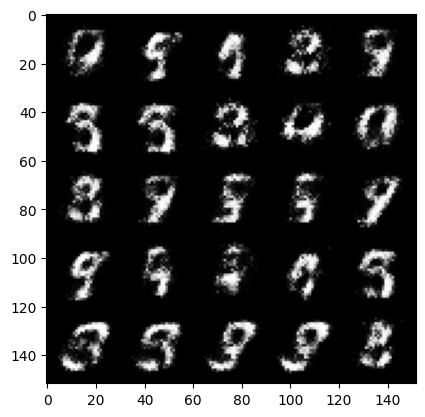

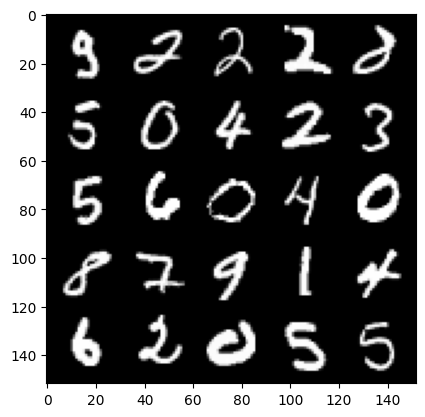

  0%|          | 0/469 [00:00<?, ?it/s]

Step 14500: Generator loss: 3.6414948921203636, discriminator loss: 0.12666170372068888


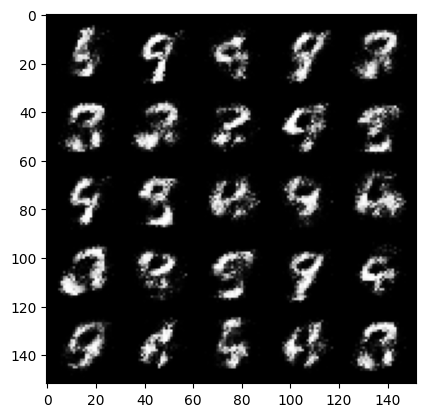

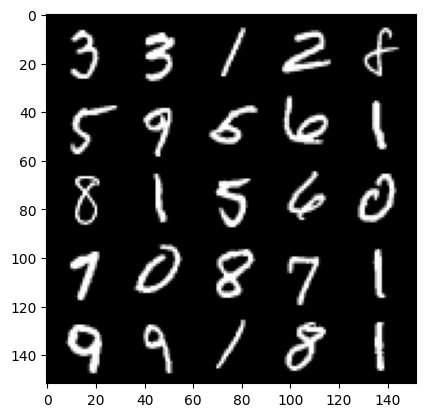

  0%|          | 0/469 [00:00<?, ?it/s]

Step 15000: Generator loss: 3.5993819861412035, discriminator loss: 0.11714573287963871


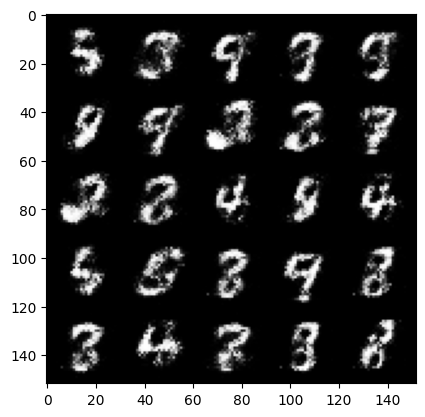

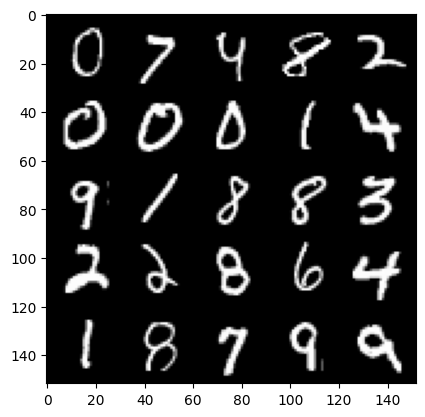

  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/469 [00:00<?, ?it/s]

Step 15500: Generator loss: 3.6200633468627905, discriminator loss: 0.12279913090169436


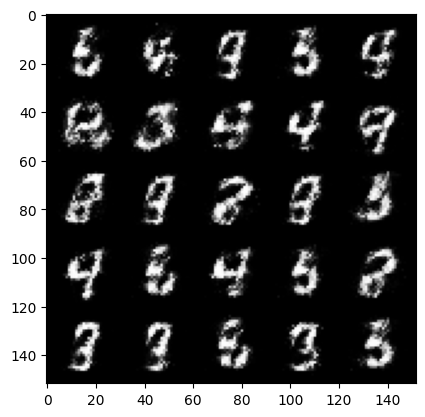

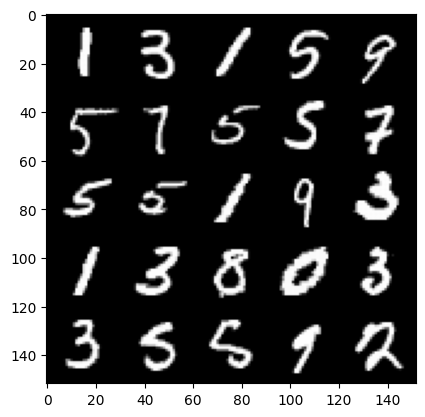

  0%|          | 0/469 [00:00<?, ?it/s]

Step 16000: Generator loss: 3.5380173182487478, discriminator loss: 0.13401029333472242


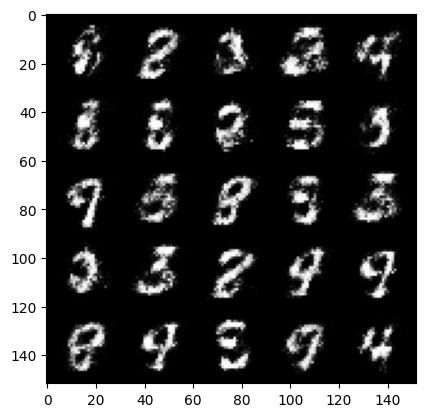

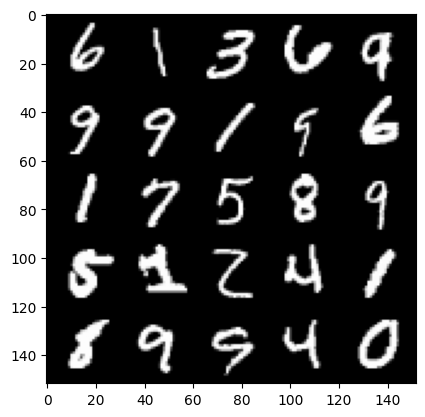

  0%|          | 0/469 [00:00<?, ?it/s]

Step 16500: Generator loss: 3.3178147306442236, discriminator loss: 0.1464800006896258


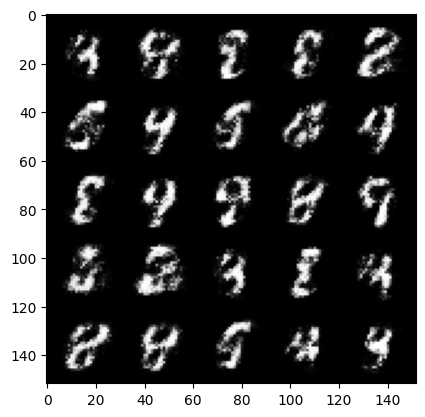

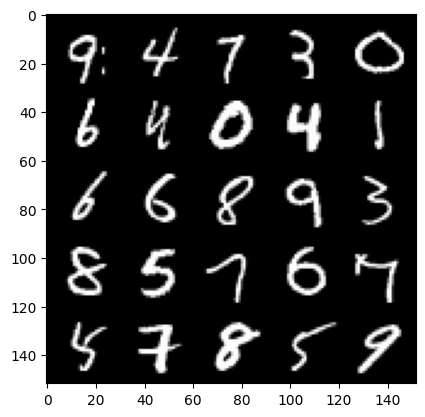

  0%|          | 0/469 [00:00<?, ?it/s]

Step 17000: Generator loss: 3.1604727401733403, discriminator loss: 0.170469632089138


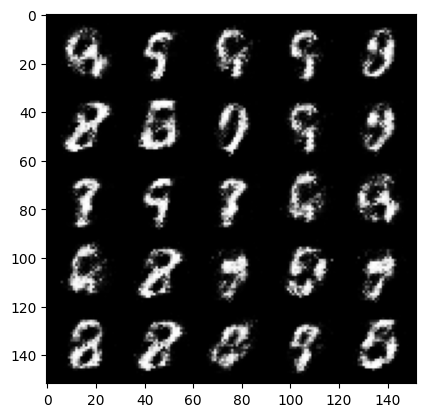

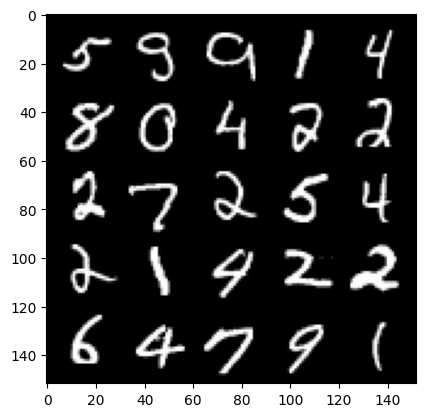

  0%|          | 0/469 [00:00<?, ?it/s]

Step 17500: Generator loss: 3.1550193734169008, discriminator loss: 0.15576751257479188


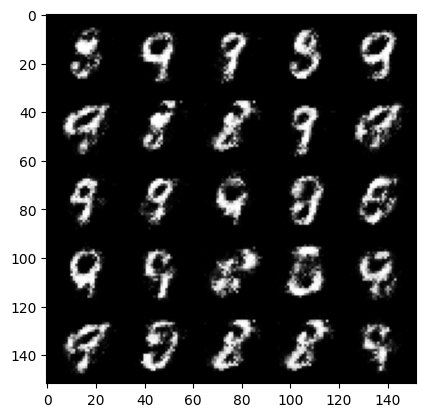

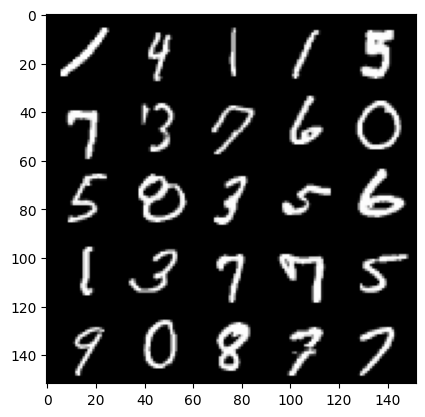

  0%|          | 0/469 [00:00<?, ?it/s]

Step 18000: Generator loss: 3.1378058743476873, discriminator loss: 0.16914607767760748


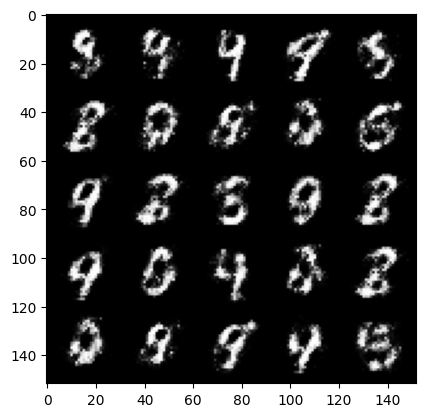

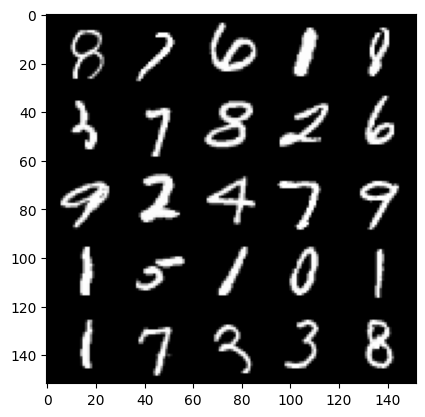

  0%|          | 0/469 [00:00<?, ?it/s]

Step 18500: Generator loss: 3.1901797571182255, discriminator loss: 0.15852661460638057


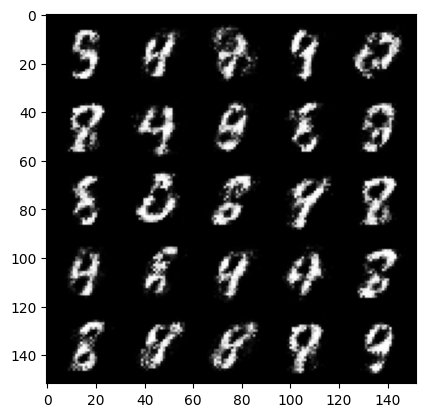

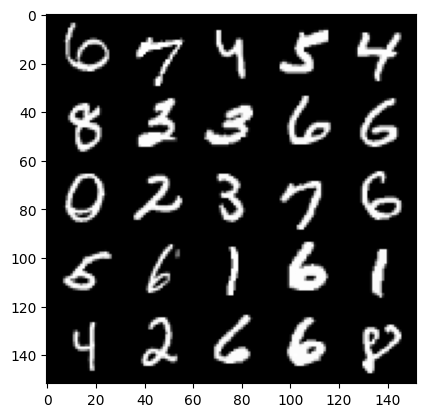

In [ ]:
cur_step = 0
mean_generator_loss = 0
mean_discriminator_loss = 0
test_generator = True # Whether the generator should be tested
gen_loss = False
error = False
for epoch in range(n_epochs):

    # Dataloader returns the batches
    for real, _ in tqdm(dataloader):
        cur_batch_size = len(real)

        # Flatten the batch of real images from the dataset
        real = real.view(cur_batch_size, -1).to(device)

        ### Update discriminator ###
        # Zero out the gradients before backpropagation
        disc_opt.zero_grad()

        # Calculate discriminator loss
        disc_loss = get_disc_loss(gen, disc, criterion, real, cur_batch_size, z_dim, device)

        # Update gradients
        disc_loss.backward(retain_graph=True)

        # Update optimizer
        disc_opt.step()

        # For testing purposes, to keep track of the generator weights
        if test_generator:
            old_generator_weights = gen.gen[0][0].weight.detach().clone()

        ### Update generator ###
        #     Hint: This code will look a lot like the discriminator updates!
        #     These are the steps you will need to complete:
        #       1) Zero out the gradients.
        #       2) Calculate the generator loss, assigning it to gen_loss.
        #       3) Backprop through the generator: update the gradients and optimizer.
        #### START CODE HERE ####
        gen_opt.zero_grad()
        gen_loss = get_gen_loss(gen, disc, criterion, cur_batch_size, z_dim, device)
        gen_loss.backward()
        gen_opt.step()
        #### END CODE HERE ####

        # For testing purposes, to check that your code changes the generator weights
        if test_generator:
            try:
                assert lr > 0.0000002 or (gen.gen[0][0].weight.grad.abs().max() < 0.0005 and epoch == 0)
                assert torch.any(gen.gen[0][0].weight.detach().clone() != old_generator_weights)
            except:
                error = True
                print("Runtime tests have failed")

        # Keep track of the average discriminator loss
        mean_discriminator_loss += disc_loss.item() / display_step

        # Keep track of the average generator loss
        mean_generator_loss += gen_loss.item() / display_step

        ### Visualization code ###
        if cur_step % display_step == 0 and cur_step > 0:
            print(f"Step {cur_step}: Generator loss: {mean_generator_loss}, discriminator loss: {mean_discriminator_loss}")
            fake_noise = get_noise(cur_batch_size, z_dim, device=device)
            fake = gen(fake_noise)
            show_tensor_images(fake)
            show_tensor_images(real)
            mean_generator_loss = 0
            mean_discriminator_loss = 0
        cur_step += 1